In [74]:
import json
from matplotlib import pyplot as plt
from typing import List
import numpy as np
from brush import decode_rle, mask2rle
from skimage import io

In [75]:
file_path = "example_project.json"
with open(file_path, "r") as f:
    data = json.load(f)


data

[{'id': 365672,
  'annotations': [{'id': 100633,
    'completed_by': 1,
    'result': [{'original_width': 1794,
      'original_height': 1412,
      'image_rotation': 0,
      'value': {'format': 'rle',
       'rle': [0,
        154,
        156,
        32,
        57,
        27,
        255,
        255,
        255,
        0,
        255,
        255,
        224,
        31,
        255,
        252,
        3,
        255,
        255,
        128,
        127,
        255,
        240,
        15,
        255,
        254,
        1,
        255,
        255,
        192,
        63,
        255,
        248,
        7,
        255,
        255,
        0,
        255,
        255,
        224,
        31,
        255,
        252,
        3,
        255,
        255,
        128,
        127,
        255,
        240,
        15,
        255,
        254,
        1,
        255,
        255,
        192,
        63,
        255,
        248,
        7,
        255,
        255

In [76]:
rle = data[0]["annotations"][0]["result"][0]["value"]["rle"]
original_width = data[0]["annotations"][0]["result"][0]["original_width"]
original_height = data[0]["annotations"][0]["result"][0]["original_height"]

/home/xujia/miniconda3/envs/src/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/tmp/ipykernel_67781/143248147.py:4: UserWarning: mask.png is a low contrast image
  io.imsave("mask.png", mask)


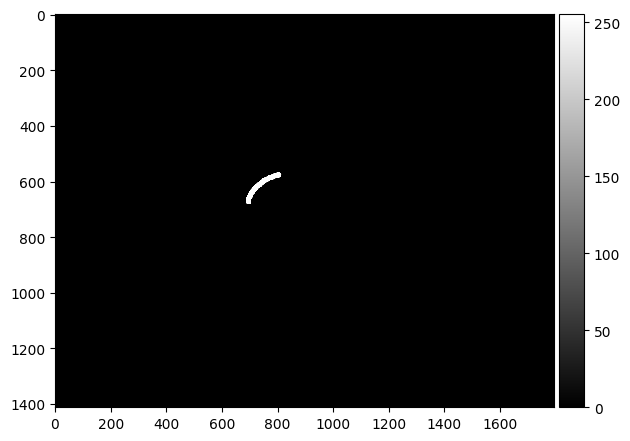

In [77]:
mask = decode_rle(rle).reshape(original_height, original_width, 4)[:, :, 3]

io.imshow(mask, cmap="gray")
io.imsave("mask.png", mask)

In [80]:
restored_rle = mask2rle(mask)

print(all(np.array(restored_rle) == np.array(rle)))

True
